In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df=pd.read_csv("df_output.csv")
dominant_topic=pd.read_csv("df_dominant_topic.csv")
dominant_topics=pd.read_csv("df_dominant_topics.csv")
sent_topics_sorteddf_mallet=pd.read_csv("sent_topics_sorteddf_mallet.csv")
topic_polarity=pd.read_csv("topic_polarity.csv")

In [5]:
df.head(10)

,Unnamed: 0,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,...,15,16,17,18,19,20,21,22,23,24
0,0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07,...,0,0,0,0,0,0,0,0,0,0
1,0,_TraceDollFace_,Oh a reunion heyyy #Alone,0,0,#Alone,NY,2020-07-11,19:43:21,2020-07,...,0,0,0,0,0,0,0,0,0,0
2,0,sackec,Couldn’t be more accurate! The MLS will now ha...,0,0,#getoutofnyasfastasyoucan #sadness,NY,2020-07-01,12:42:16,2020-07,...,0,0,0,0,0,0,0,0,0,0
3,0,MamaAlboranista,#Repost goldenrulewill ・・・ via @lovewillam_ #R...,0,2,#Repost #Repost #suicideawarness #suicide #dep...,NY,2020-07-10,17:56:18,2020-07,...,0,0,0,0,0,0,0,0,0,0
4,0,Moosekj25,"Hey, so if Maxwell meets a premature end here ...",0,0,#DeepStateCabal #PANIC,NY,2020-07-10,13:34:46,2020-07,...,0,0,0,0,0,0,0,0,0,0
5,0,jabreu69,You have the power to control your own life. ....,0,0,#repost #meditate #meditation #awakening #love...,NY,2020-07-11,13:49:18,2020-07,...,0,0,0,0,0,0,0,0,0,0
6,0,nanafrombk,when life gives you lemons. #lemons #plants #p...,0,0,#lemons #plants #plant #sun #nature #planting ...,NY,2020-07-09,00:51:14,2020-07,...,0,0,0,0,0,0,0,0,0,0
7,0,elizabeth_banta,homemade cuban sandwiches & strawberry daiquir...,0,5,#stayhome #stayhome,NY,2020-07-11,23:47:51,2020-07,...,0,0,0,0,0,0,0,0,0,0
8,1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,2020-07,...,0,0,0,0,0,0,0,0,0,0
9,1,_TraceDollFace_,When we get down to the winner...I'm crying by...,0,0,#Alone,NY,2020-07-11,19:34:19,2020-07,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df=df.dropna()

In [10]:
df["people, life, change, die, virus, save, kill, normal, sick, action"]

0        0.035613
1        0.035613
2        0.035613
3        0.035613
4        0.035613
5        0.035613
6        0.035613
7        0.035613
8        0.052198
9        0.052198
10       0.052198
11       0.052198
12       0.052198
13       0.052198
14       0.052198
15       0.052198
16       0.048482
17       0.048482
18       0.048482
19       0.048482
20       0.048482
21       0.048482
22       0.048482
23       0.048482
24       0.048482
25       0.036982
26       0.036982
27       0.036982
28       0.036982
29       0.036982
           ...   
26397    0.036284
26398    0.036284
26399    0.037707
26400    0.035613
26401    0.038462
26402    0.031526
26403    0.038462
26404    0.038462
26405    0.033738
26406    0.042606
26407    0.038462
26408    0.053147
26409    0.072039
26410    0.034965
26411    0.036284
26412    0.036982
26413    0.033156
26414    0.035613
26415    0.035613
26416    0.034965
26417    0.032051
26418    0.035613
26419    0.038462
26420    0.036982
26421    0

In [11]:
df.shape

(26404, 66)

In [14]:
df.columns

Index(['Unnamed: 0', 'User', 'Text', 'Retweets', 'Favorites', 'HashTags',
       'City', 'date', 'time', 'month_year', 'text_nlp', 'text_len',
       'word_count', 'polarity', 'sentiment',
       'people, life, change, die, virus, save, kill, normal, sick, action',
       'thing, make, end, talk, person, quarantine, grow, win, reason, light',
       'face, social, make, wear, weekend, mask, practice, distancing, distance, park',
       'mind, bring, moment, create, full, thought, dream, power, experience, find',
       'time, year, follow, post, hour, step, turn, ago, spend, provide',
       'good, morning, fitness, daily, hit, yoga, member, early, live, wake',
       'show, long, play, read, lol, line, picture, buy, fall, store',
       'family, friend, positive, death, case, test, rise, state, number, black',
       'check, night, watch, video, good, message, yesterday, full, late, youtube',
       'work, give, hard, smile, happen, challenge, man, pay, beat, tough',
       'day, happ

In [15]:
df=df.drop(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],axis=1)

In [16]:
df.head()

,Unnamed: 0,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,...,"order, free, call, open, food, sign, eye, studio, delivery, pick","love, great, guy, amazing, team, send, heart, job, nice, super","today, wait, book, link, bio, miss, session, tomorrow, visit, website","run, move, walk, eat, bad, easy, forward, mile, pretty, baby","feel, back, leave, important, double, energy, finally, tap, client, box","week, class, month, kid, virtual, join, dance, tomorrow, teach, photo","stop, learn, start, real, fear, part, close, break, school, share","set, exercise, minute, push, side, rest, leg, squat, schedule, info","stay, home, safe, healthy, fit, season, active, update, pray, inside","workout, body, strong, goal, high, focus, build, strength, add, level"
0,0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07,...,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613
1,0,_TraceDollFace_,Oh a reunion heyyy #Alone,0,0,#Alone,NY,2020-07-11,19:43:21,2020-07,...,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613
2,0,sackec,Couldn’t be more accurate! The MLS will now ha...,0,0,#getoutofnyasfastasyoucan #sadness,NY,2020-07-01,12:42:16,2020-07,...,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613
3,0,MamaAlboranista,#Repost goldenrulewill ・・・ via @lovewillam_ #R...,0,2,#Repost #Repost #suicideawarness #suicide #dep...,NY,2020-07-10,17:56:18,2020-07,...,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613
4,0,Moosekj25,"Hey, so if Maxwell meets a premature end here ...",0,0,#DeepStateCabal #PANIC,NY,2020-07-10,13:34:46,2020-07,...,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613,0.052073,0.035613,0.035613,0.035613


In [18]:
df_neg=df[df["sentiment"]=="negative"]

In [20]:
df_neg.shape

(2912, 41)

In [21]:
df_neg.head(2)

,Unnamed: 0,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,...,"order, free, call, open, food, sign, eye, studio, delivery, pick","love, great, guy, amazing, team, send, heart, job, nice, super","today, wait, book, link, bio, miss, session, tomorrow, visit, website","run, move, walk, eat, bad, easy, forward, mile, pretty, baby","feel, back, leave, important, double, energy, finally, tap, client, box","week, class, month, kid, virtual, join, dance, tomorrow, teach, photo","stop, learn, start, real, fear, part, close, break, school, share","set, exercise, minute, push, side, rest, leg, squat, schedule, info","stay, home, safe, healthy, fit, season, active, update, pray, inside","workout, body, strong, goal, high, focus, build, strength, add, level"
8,1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,2020-07,...,0.036325,0.034341,0.034341,0.034341,0.034341,0.034341,0.050214,0.034341,0.034341,0.034341
9,1,_TraceDollFace_,When we get down to the winner...I'm crying by...,0,0,#Alone,NY,2020-07-11,19:34:19,2020-07,...,0.036325,0.034341,0.034341,0.034341,0.034341,0.034341,0.050214,0.034341,0.034341,0.034341


In [22]:
df_neg.columns

Index(['Unnamed: 0', 'User', 'Text', 'Retweets', 'Favorites', 'HashTags',
       'City', 'date', 'time', 'month_year', 'text_nlp', 'text_len',
       'word_count', 'polarity', 'sentiment',
       'people, life, change, die, virus, save, kill, normal, sick, action',
       'thing, make, end, talk, person, quarantine, grow, win, reason, light',
       'face, social, make, wear, weekend, mask, practice, distancing, distance, park',
       'mind, bring, moment, create, full, thought, dream, power, experience, find',
       'time, year, follow, post, hour, step, turn, ago, spend, provide',
       'good, morning, fitness, daily, hit, yoga, member, early, live, wake',
       'show, long, play, read, lol, line, picture, buy, fall, store',
       'family, friend, positive, death, case, test, rise, state, number, black',
       'check, night, watch, video, good, message, yesterday, full, late, youtube',
       'work, give, hard, smile, happen, challenge, man, pay, beat, tough',
       'day, happ

Text(0.5,1,'Number of negative Tweets per city')

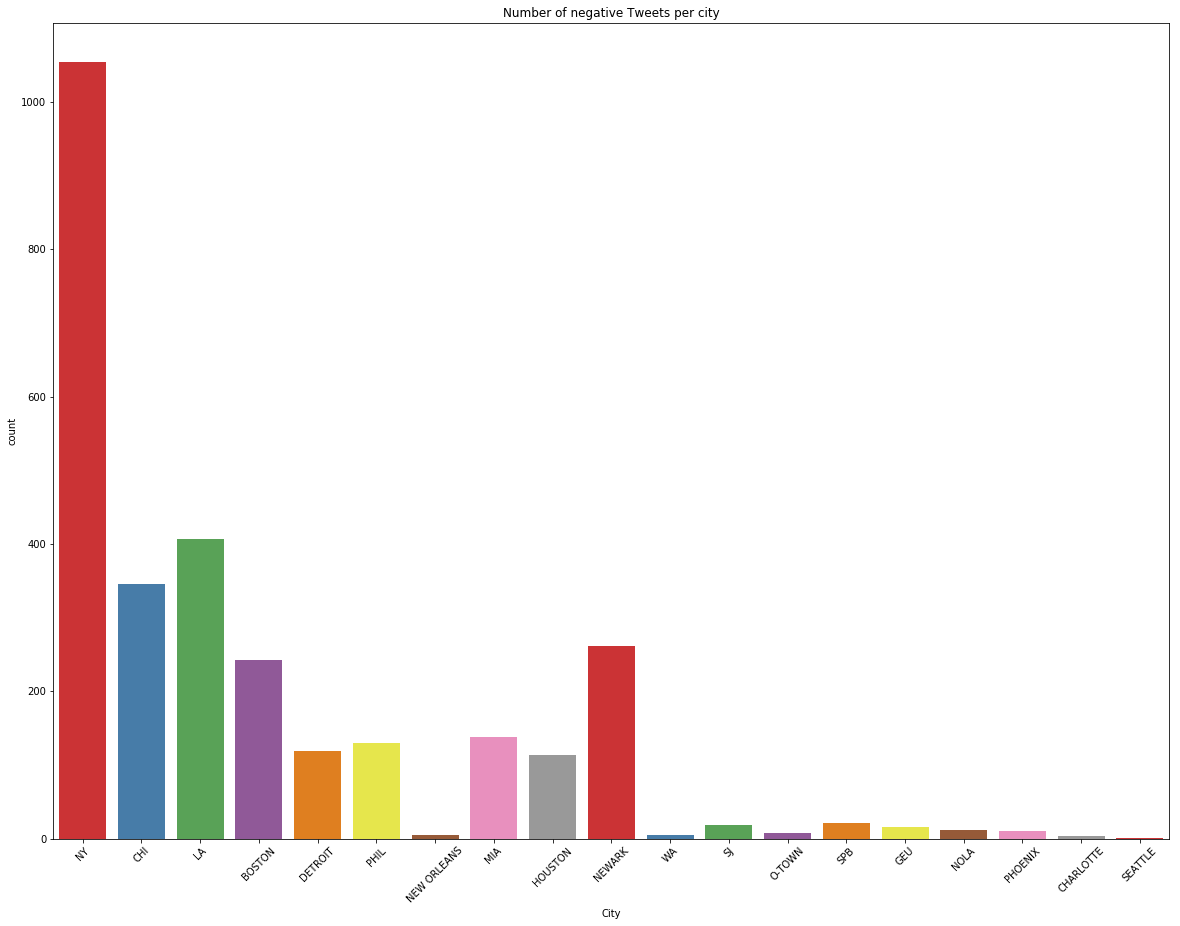

In [29]:
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
chart=sns.countplot(df["City"],palette='Set1',ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Tweets per city')

Text(0.5,1,'Number of negative Tweets per month')

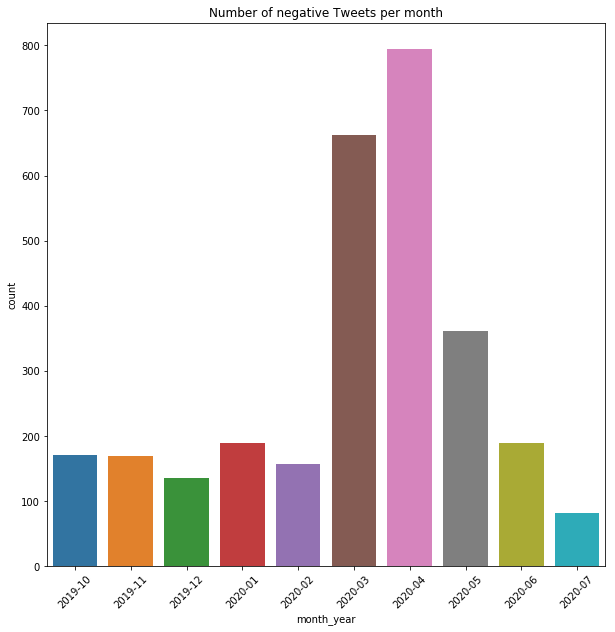

In [38]:
fig = plt.figure(figsize = (10,10))
chart = sns.countplot(df_neg['month_year'], order = sorted(df['month_year'].unique()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

chart.set_title('Number of negative Tweets per month')

Text(0.5,1,'Number of Negative Tweets per month in every city')

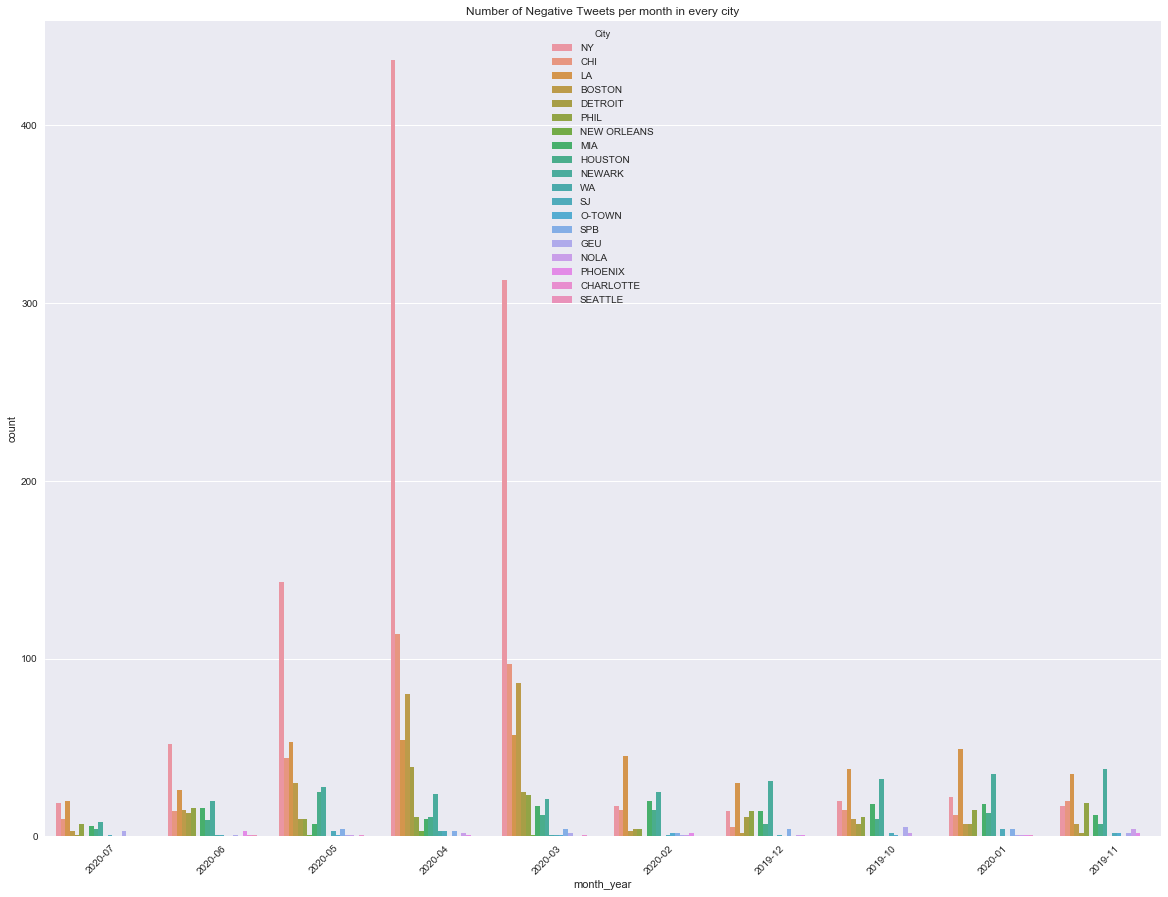

In [45]:
'''sns.set()
_=plt.hist([df_neg["month_year"][df_neg["City"]=="NY"],df_neg["month_year"][df_neg["City"]=="LA"]],rwidth=0.95,label=["NY","LA"])
plt.xlabel("Men vs Women")
plt.ylabel("frequency")
plt.title("gender comparison")
plt.legend()
plt.show()'''
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)

chart=sns.countplot(x ='month_year', hue = "City", data = df_neg)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Negative Tweets per month in every city')

In [63]:

topic_list = df.columns[15:40]
topic_mean = df.iloc[:,15:40].mean().values

for i in range(len(topic_list)):
    df[i] = np.where(df[topic_list[i]] > 0.08,1,0)
    
topic_polarity = list()
for i in range(25):
    topic_polarity.append(df[df[i]==1]['polarity'].mean())
    
topic_polarity = pd.DataFrame({'Topics':topic_list,'Polarity':topic_polarity})
topic_polarity.sort_values(by = ['Polarity'],ascending=False)


,Topics,Polarity
9,"work, give, hard, smile, happen, challenge, ma...",0.168467
19,"run, move, walk, eat, bad, easy, forward, mile...",0.168011
3,"mind, bring, moment, create, full, thought, dr...",0.159847
14,"live, tonight, pm, join, meditation, share, mu...",0.159484
13,"world, place, put, remember, hope, lot, story,...",0.157494
12,"friend, listen, big, hand, game, lose, head, r...",0.156550
5,"good, morning, fitness, daily, hit, yoga, memb...",0.155635
24,"stay, home, safe, healthy, fit, season, active...",0.151706
21,"week, class, month, kid, virtual, join, dance,...",0.151236
17,"love, great, guy, amazing, team, send, heart, ...",0.149954


In [64]:
topic_polarity.to_csv("topic_polarity1.csv")

In [54]:
negative_topics=topic_polarity[topic_polarity["Polarity"]<0.133019]

In [66]:
most_negative_topics=negative_topics["Topics"]

In [73]:
most_negative_topics[1]

'thing, make, end, talk, person, quarantine, grow, win, reason, light'